## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

In [2]:
! git clone https://github.com/ds3001f25/clustering_assignment.git

Cloning into 'clustering_assignment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 7 (from 1)
Receiving objects: 100% (9/9), 221.98 KiB | 3.52 MiB/s, done.


In [3]:
cd clustering_assignment/

/content/clustering_assignment


In [4]:
%cd data/

/content/clustering_assignment/data


In [5]:
ls -al

total 516
drwxr-xr-x 2 root root   4096 Sep 29 18:01  ./
drwxr-xr-x 4 root root   4096 Sep 29 18:01  ../
-rw-r--r-- 1 root root  45921 Sep 29 18:01 '2022 election cycle fundraising.csv'
-rw-r--r-- 1 root root 466989 Sep 29 18:01 'SIPRI Military Expenditure Database.csv'


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1.1

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

1.2 - 0.125

<Axes: xlabel='x1', ylabel='x2'>

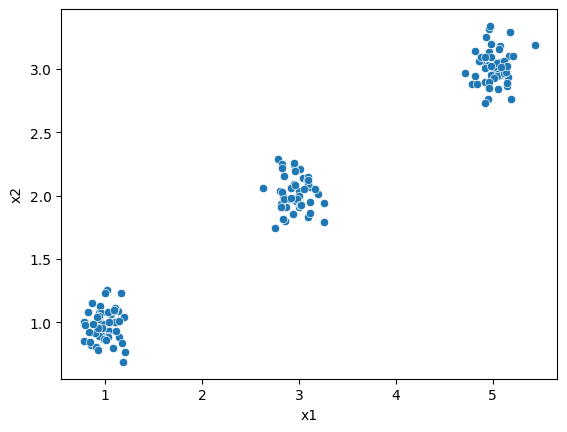

In [7]:
sns.scatterplot(data=df0_125,x='x1',y='x2')

1.2 - 0.25

<Axes: xlabel='x1', ylabel='x2'>

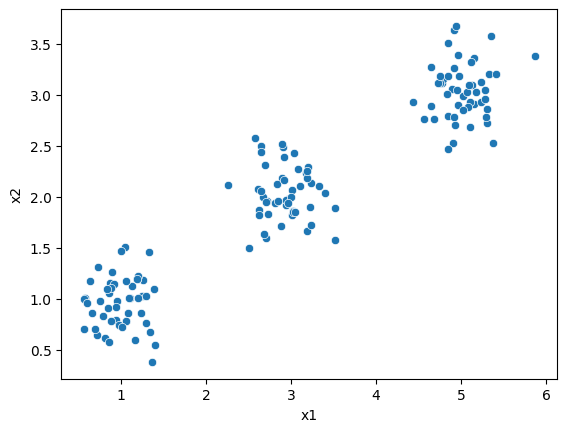

In [8]:
sns.scatterplot(data=df0_25,x='x1',y='x2')

1.2 - 0.5

<Axes: xlabel='x1', ylabel='x2'>

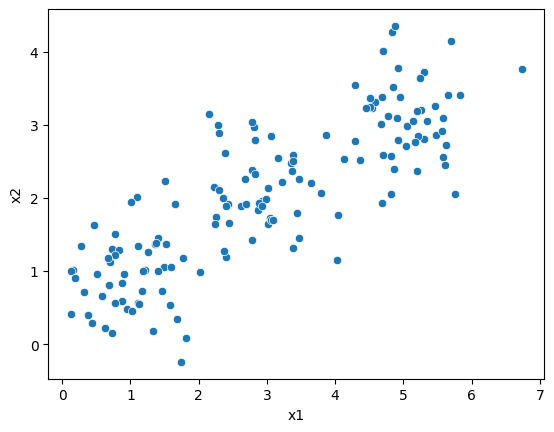

In [9]:
sns.scatterplot(data=df0_5,x='x1',y='x2')

1.2 - 1.0

<Axes: xlabel='x1', ylabel='x2'>

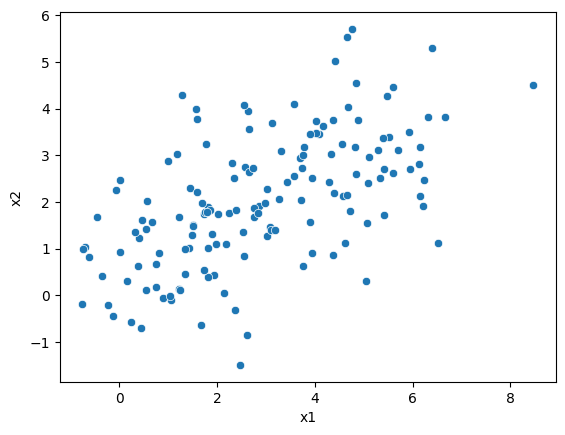

In [10]:
sns.scatterplot(data=df1_0,x='x1',y='x2')

1.2 - 2.0

<Axes: xlabel='x1', ylabel='x2'>

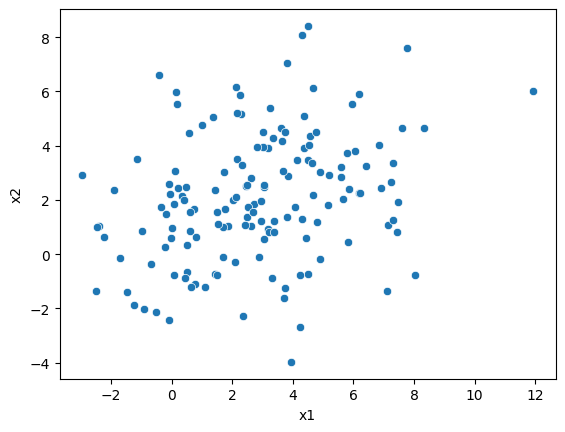

In [11]:
sns.scatterplot(data=df2_0,x='x1',y='x2')

1.2 - As the noise increases, the clusters spread out more and more and it becomes harder to distinguish between the different clusters. The linear relationship that is suggested in the 0.5 plot practically disappears by the last plot.

1.3

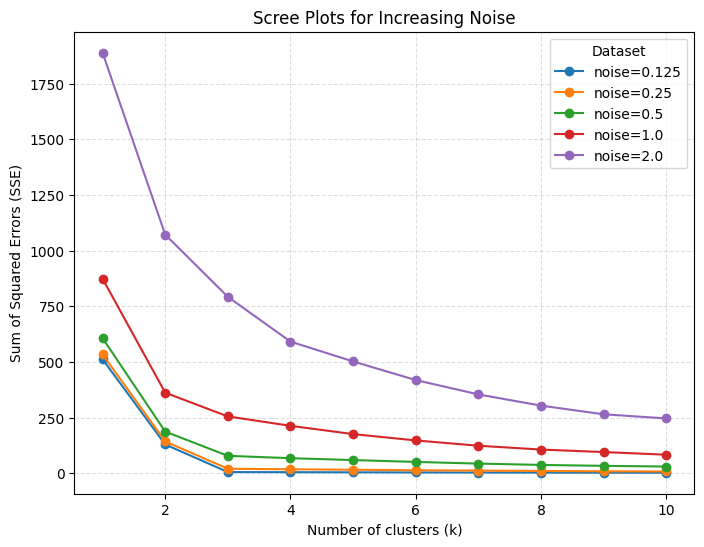

In [14]:
def scree_vals(df, k_bar=10):
    # take in a dataframe and max number of clusters k_bar (default 10)
    X = df[['x1','x2']].values  # get x1 and x2 columns as numpy array
    SSE = []  # create empty list to store sum of squared errors


    # this loops over number of clusters from 1 to k_bar
    for k in range(1, k_bar+1):
        # create kmeans model with k clusters, 10 tries, max 300 iters, fixed seed
        km = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=0)
        km.fit(X)  # fit model to data
        SSE.append(km.inertia_)  # append sum of squared errors (inertia) for this k
    return SSE  # return list of SSE values for each k


# dictionary holding different datasets with different noise levels
datasets = {
    'noise=0.125': df0_125,
    'noise=0.25' : df0_25,
    'noise=0.5'  : df0_5,
    'noise=1.0'  : df1_0,
    'noise=2.0'  : df2_0
}


k_bar = 10  # max number of clusters for scree plot
results = {}  # empty dict to store analysis results

# loop through each dataset and calculate scree values (SSEs)
for name, df in datasets.items():
    results[name] = scree_vals(df, k_bar=k_bar)


plt.figure(figsize=(8,6))
k_values = np.arange(1, k_bar+1)  # array from 1 to k_bar inclusive for x-axis

# plot each dataset's SSE values against number of clusters
for name, SSE in results.items():
    plt.plot(k_values, SSE, marker='o', label=name)  # plot points with markers and label

# add labels and title to plot
plt.title('Scree Plots for Increasing Noise')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.legend(title='Dataset')  # add legend w/ title
plt.grid(True, linestyle='--', alpha=0.4)  # add light dashed grid
plt.show()


1.3- There is a sharp elbow at k=3, where the SSE decreases sharply before leeveling out. This is more detectable at low noise levels, but is harder to distinguish as noise increases and SSE decreases more smoothly.

1.4- The optimal k is the k value that minimizes the sum of squared errors. Adding more clusters always lowers SSE and therefore there is a steep decline at that point, which creates the elbow. When noise increased and points didn't form clean cores, the elbow lessens in severity.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?